<a href="https://colab.research.google.com/github/aaryaman11/cs480student/blob/main/01/Copy_of_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

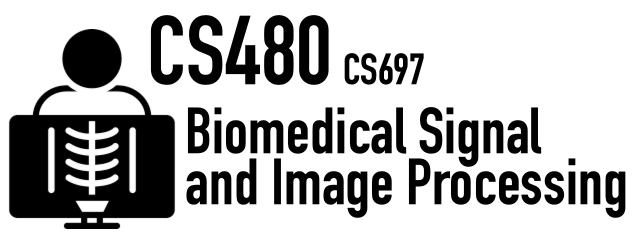
# Assignment 1


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [3]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [4]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

In [5]:
ecg

array([-0.245, -0.215, -0.185, ..., -0.405, -0.395, -0.385])

In [6]:
ecg.dtype

dtype('float64')

In [7]:
ecg.nbytes

864000

In [8]:
print(ecg[0])
print(ecg[1])

-0.245
-0.215


In [9]:
ecg[0:10]

array([-0.245, -0.215, -0.185, -0.175, -0.17 , -0.17 , -0.185, -0.17 ,
       -0.16 , -0.15 ])

In [10]:
ecg[0:10:2] # first ten values but only every second one 

array([-0.245, -0.185, -0.17 , -0.185, -0.16 ])

In [11]:
ecg[:SAMPLING_RATE] # first 360 values of the ecg signal

array([-0.245, -0.215, -0.185, -0.175, -0.17 , -0.17 , -0.185, -0.17 ,
       -0.16 , -0.15 , -0.17 , -0.205, -0.22 , -0.23 , -0.21 , -0.19 ,
       -0.175, -0.185, -0.19 , -0.19 , -0.2  , -0.2  , -0.21 , -0.205,
       -0.215, -0.205, -0.225, -0.235, -0.225, -0.205, -0.21 , -0.2  ,
       -0.2  , -0.195, -0.185, -0.19 , -0.215, -0.22 , -0.195, -0.195,
       -0.22 , -0.25 , -0.22 , -0.165, -0.15 , -0.145, -0.185, -0.195,
       -0.195, -0.185, -0.17 , -0.16 , -0.16 , -0.18 , -0.205, -0.2  ,
       -0.165, -0.135, -0.13 , -0.13 , -0.13 , -0.11 , -0.065, -0.03 ,
       -0.04 , -0.055, -0.055, -0.035,  0.   ,  0.015,  0.015,  0.   ,
        0.01 ,  0.015,  0.02 ,  0.035,  0.045,  0.04 ,  0.03 ,  0.025,
        0.005, -0.005, -0.025, -0.05 , -0.05 , -0.045, -0.025, -0.02 ,
       -0.035, -0.065, -0.065, -0.075, -0.07 , -0.085, -0.1  , -0.14 ,
       -0.145, -0.14 , -0.115, -0.095, -0.09 , -0.1  , -0.11 , -0.125,
       -0.125, -0.11 , -0.085, -0.095, -0.08 , -0.065, -0.03 , -0.04 ,
      

In [12]:
secondsecond = ecg[1*SAMPLING_RATE:2*SAMPLING_RATE] # the 2nd second of signal

In [13]:
thirdsecond = ecg[2*SAMPLING_RATE:3*SAMPLING_RATE] # the 3rd second of signal

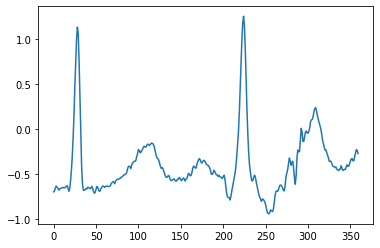

In [14]:
plt.plot(thirdsecond)

In [15]:
from9to11 = thirdsecond = ecg[8*SAMPLING_RATE:11*SAMPLING_RATE]

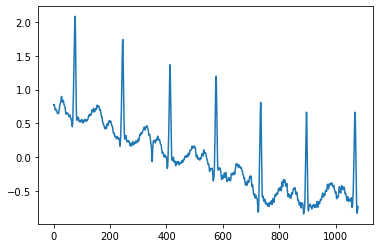

In [16]:
plt.plot(from9to11)

In [17]:
len(from9to11)

1080

In [18]:
1080/360

3.0

In [19]:
a = [-0.245, -0.215]

In [20]:
a

[-0.245, -0.215]

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [21]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [25]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [26]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [27]:
# Vlad helped me in Task 2
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


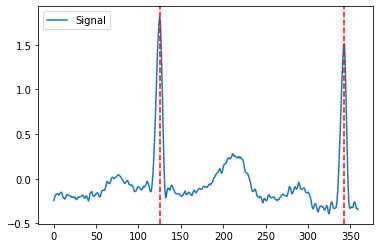

In [28]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [31]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

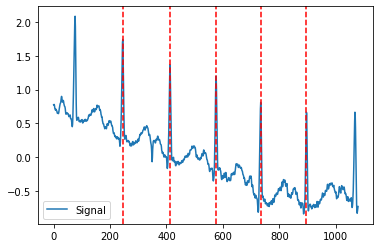

In [52]:
#_, rpeaks1 = nk.ecg_peaks(ecg[7*SAMPLING_RATE:12*SAMPLING_RATE], sampling_rate=SAMPLING_RATE)
_, rpeaks1 = nk.ecg_peaks(ecg[8*SAMPLING_RATE:11*SAMPLING_RATE], sampling_rate=SAMPLING_RATE)

plot = nk.events_plot(rpeaks1['ECG_R_Peaks'], ecg[8*SAMPLING_RATE:11*SAMPLING_RATE])

**Task 3:** Detect Heartrate. [15 Points]

In [ ]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [85]:
# Kunal jain helped me in calculating the heartrate
# calculate the heart rate  
number_of_peaks = 5
time = 3
heartrate = (5*60)/3
print(heartrate)

100.0


By looking at the graph, the patient doesn't seem to have regular health beat. I think the paitient have a irregular heart beat  

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

In [ ]:
# TODO Does the detection work well?

yes the detetion works well

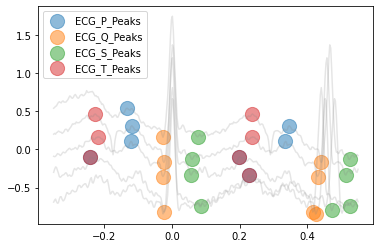

In [53]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg[8*SAMPLING_RATE:11*SAMPLING_RATE], rpeaks1, sampling_rate=SAMPLING_RATE, method="peak", show = True, show_type = 'peaks')

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

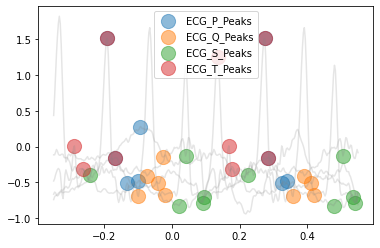

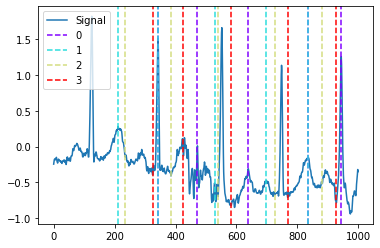

In [62]:

# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg, rpeaks1, sampling_rate=SAMPLING_RATE, method="peak", show = True, show_type = 'peaks')

# Zooming into the first 5 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5],
                       waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5]], ecg[:1000])

In [61]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

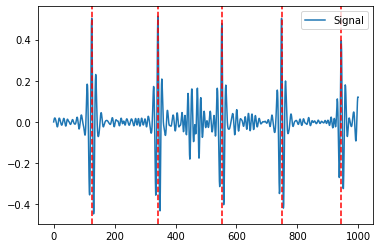

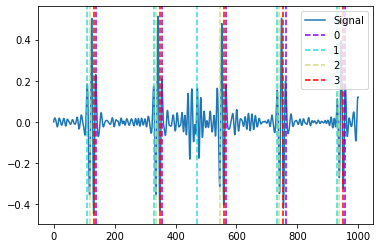

In [79]:
# fixed some errors of filter using idubey-code code
filter = nk.signal_filter(ecg, sampling_rate = SAMPLING_RATE, lowcut = 20, highcut = 40)
_, rpeaks2 = nk.ecg_peaks(filter, sampling_rate=SAMPLING_RATE)
plot= nk.events_plot(rpeaks2['ECG_R_Peaks'][:5], filter[:1000])
_, waves_peak2 = nk.ecg_delineate(filter, rpeaks2, sampling_rate=SAMPLING_RATE, method="peak")
plot = nk.events_plot([waves_peak2['ECG_T_Peaks'][:5],
                       waves_peak2['ECG_P_Peaks'][:5],
                       waves_peak2['ECG_Q_Peaks'][:5],
                       waves_peak2['ECG_S_Peaks'][:5]], filter[:1000])

In [ ]:
# TODO Does the filtering improve the result?

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#